In [35]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,9]

In [36]:
df = pd.read_csv('data/crypto.csv')

In [37]:
df

,Asset_Name,timestamp,Close
0,Bitcoin Cash,2018-01-01,2374.5900
1,Bitcoin Cash,2018-01-02,2323.3200
2,Bitcoin Cash,2018-01-03,2551.2850
3,Bitcoin Cash,2018-01-04,2557.6467
4,Bitcoin Cash,2018-01-05,2354.4433
...,...,...,...
18097,Dogecoin,2021-09-17,0.2416
18098,Dogecoin,2021-09-18,0.2401
18099,Dogecoin,2021-09-19,0.2413
18100,Dogecoin,2021-09-20,0.2331


In [38]:
bit = df[df['Asset_Name'] == 'Bitcoin']

In [39]:
bit

,Asset_Name,timestamp,Close
2720,Bitcoin,2018-01-01,13850.1760
2721,Bitcoin,2018-01-02,13468.6980
2722,Bitcoin,2018-01-03,14743.4240
2723,Bitcoin,2018-01-04,15107.7920
2724,Bitcoin,2018-01-05,15158.4920
...,...,...,...
4075,Bitcoin,2021-09-17,47769.5096
4076,Bitcoin,2021-09-18,47333.4914
4077,Bitcoin,2021-09-19,48295.5087
4078,Bitcoin,2021-09-20,47272.4743


In [40]:
eth = df[df['Asset_Name'] == 'Ethereum']

In [41]:
eth

,Asset_Name,timestamp,Close
6800,Ethereum,2018-01-01,738.5075
6801,Ethereum,2018-01-02,757.3900
6802,Ethereum,2018-01-03,859.6750
6803,Ethereum,2018-01-04,935.4225
6804,Ethereum,2018-01-05,941.2525
...,...,...,...
8155,Ethereum,2021-09-17,3570.6356
8156,Ethereum,2021-09-18,3401.4414
8157,Ethereum,2021-09-19,3433.6931
8158,Ethereum,2021-09-20,3334.9971


<Axes: xlabel='timestamp'>

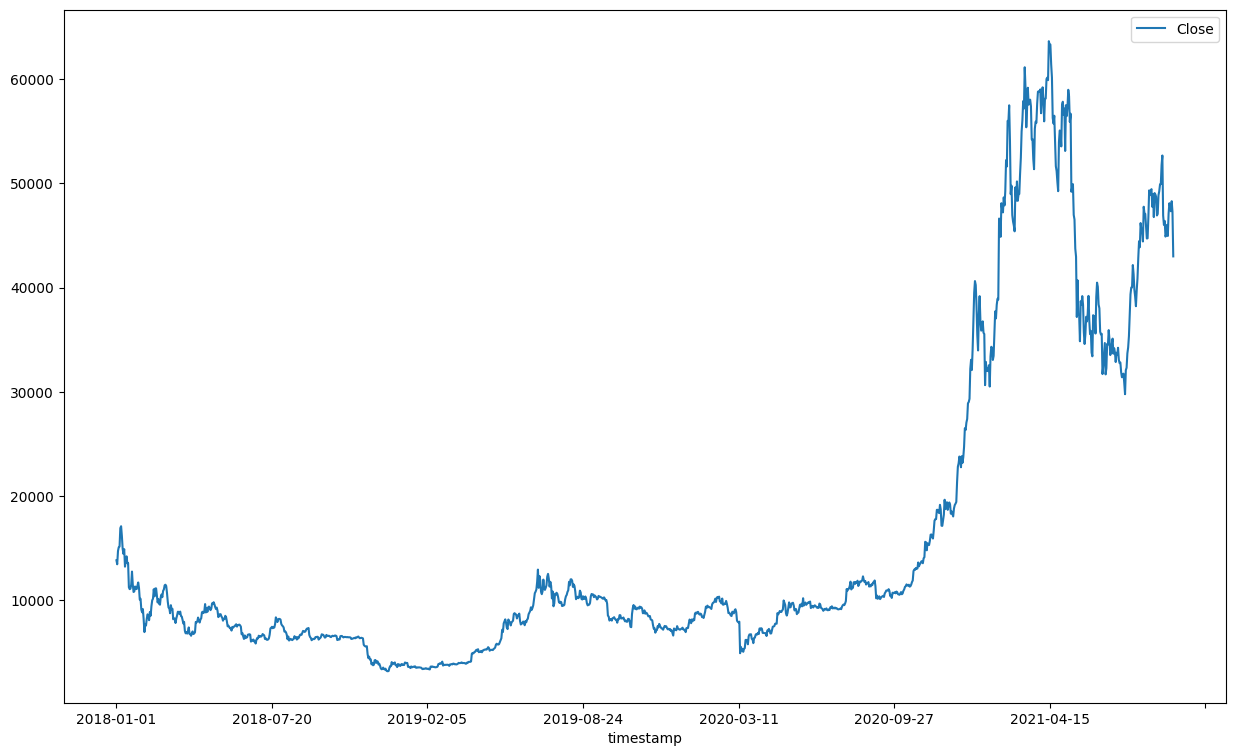

In [42]:
bit.plot(x='timestamp', y='Close')

<Axes: xlabel='timestamp'>

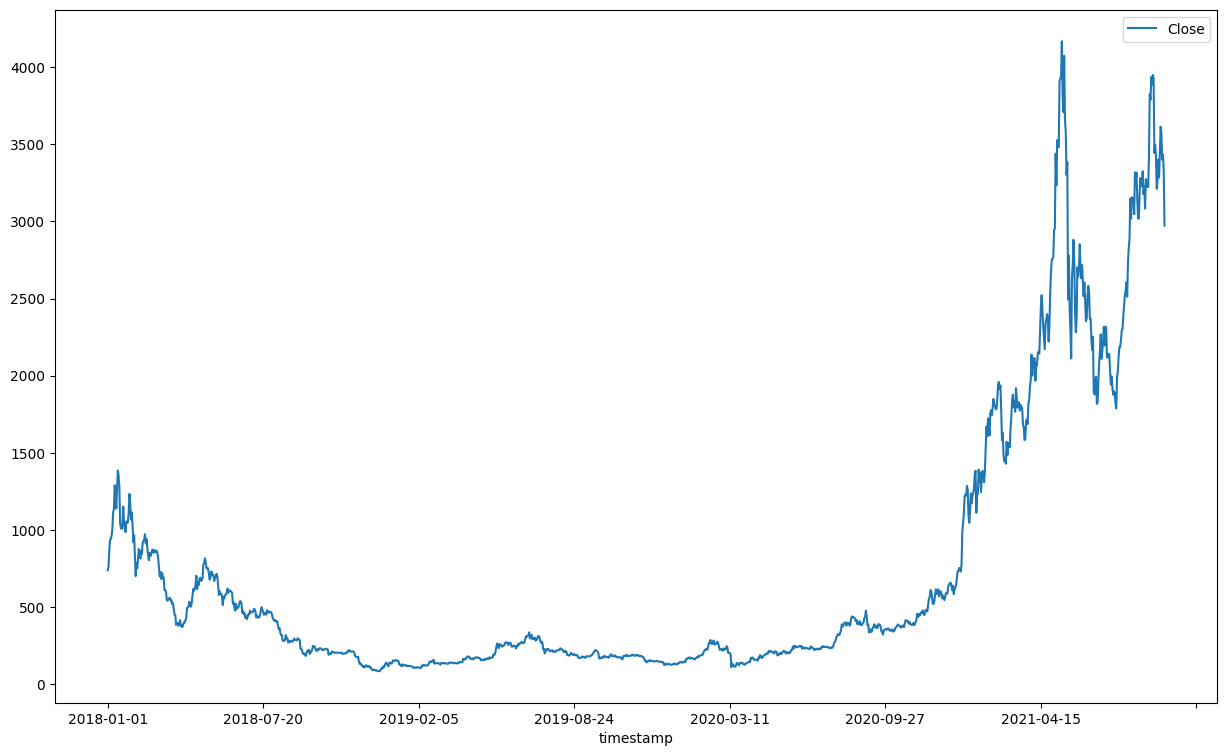

In [43]:
eth.plot(x='timestamp', y='Close')

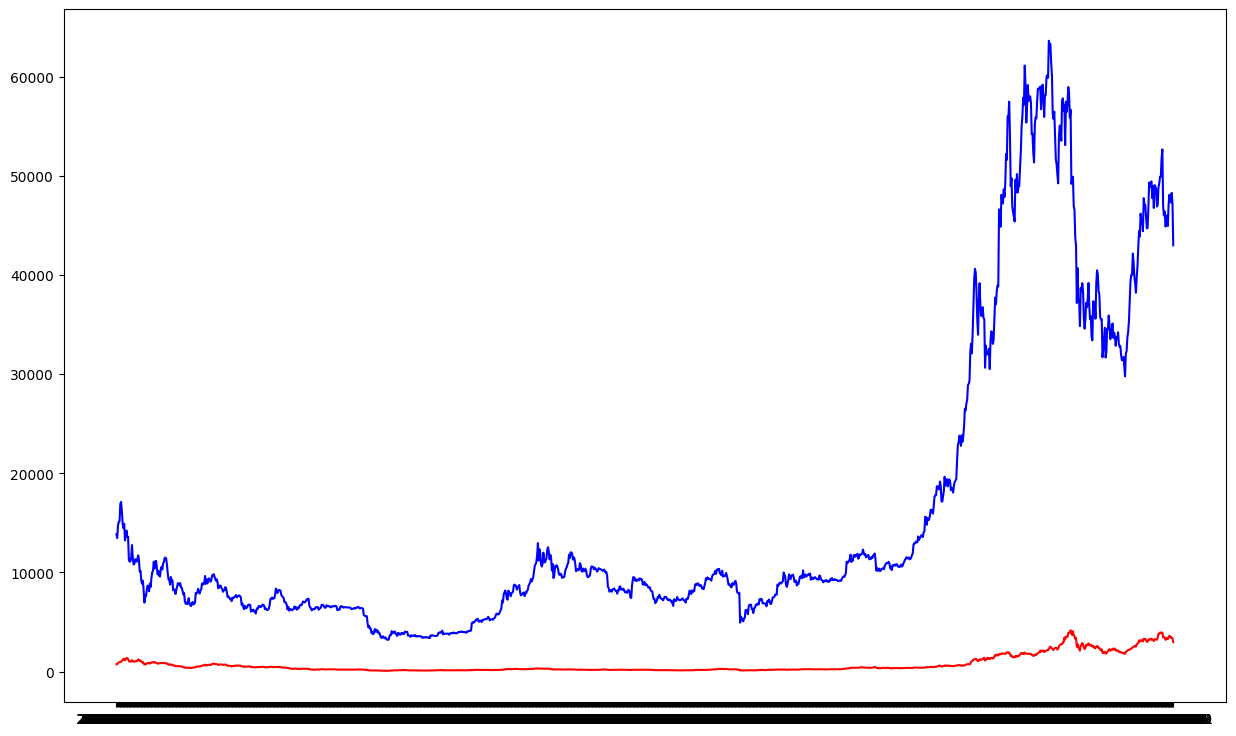

In [44]:
plt.plot(bit['timestamp'], bit['Close'], label='Bitcoin', color='blue')
plt.plot(eth['timestamp'], eth['Close'], label='Ethereum', color='red')